<hr>
<h2>Ejercicio</h2>

En los modelos de ML es muy importante usar como variables predictoras aquellas que tengan una baja correlación entre ellas, y ahí es donde entra PCA en nuestro análisis.

La siguiente línea importa un data set que contiene información sobre el estatus socioeconómico de diferentes países.

In [231]:
    # Supress Warnings
    import warnings
    warnings.filterwarnings('ignore')

    #read data
    data = pd.read_csv('Country-data.csv')
    data.set_index('country', inplace = True)
    data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


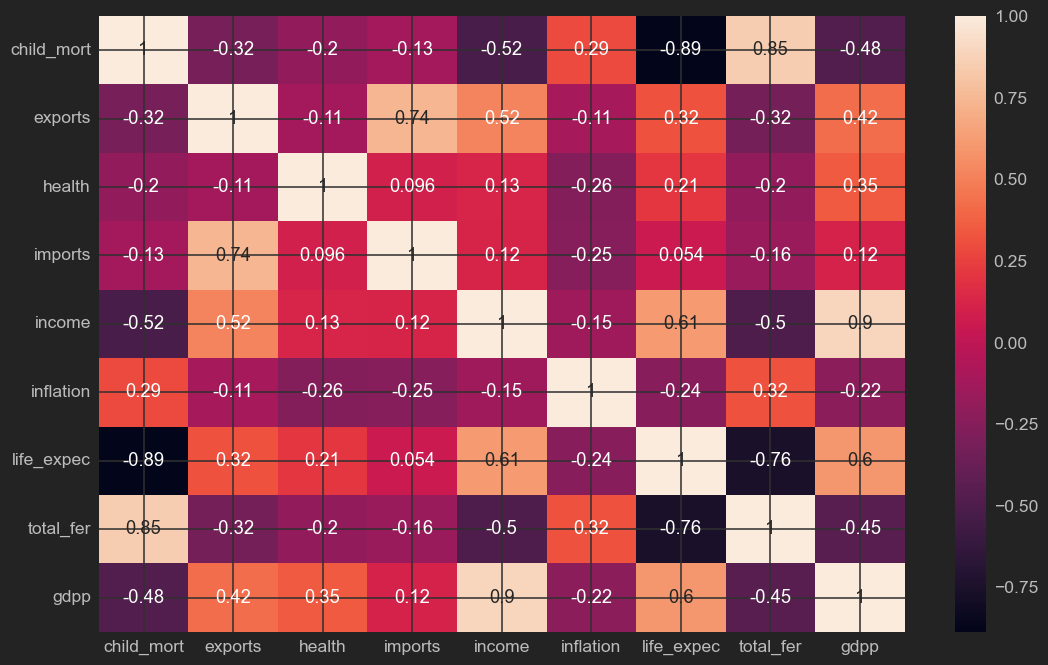

In [232]:
fig, ax = plt.subplots(figsize = (13, 8))

sns.heatmap(data.corr(), ax = ax, annot = True);

Como se puede observar en la matriz de correlación tenemos varias variables (columnas) con una alta correlación.

- Haga una inspección y limpieza general del DataFrame (NaN's y outliers)
- Aplique PCA para encontrar las componentes principales del DataFrame
    - Utilice el criterio de la varianza explicada para conocer el número de componentes
    
- Grafique la matriz de covarianza de las componentes principales para corroborar que las componentes que obtuvimos tienen poca correlación entre ellas.

In [4]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
# Suprimir advertencias
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Leer datos
data = pd.read_csv('Country-data.csv')
data.set_index('country', inplace=True)

In [7]:
# Inspección y limpieza general del DataFrame
# Tratar NaN's
data_cleaned = data.dropna()

In [8]:
# Manejar outliers (IQR para identificar y tratar outliers)
# Aplicar escalado estándar
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

In [9]:
# Aplicar PCA para encontrar las componentes principales
pca = PCA()
components = pca.fit_transform(data_scaled)

In [10]:
# Varianza explicada
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

In [11]:
# Encontrar el número óptimo de componentes con el criterio de la varianza explicada
num_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

In [12]:
# Imprimir el número de componentes seleccionado
print(f'Número óptimo de componentes: {num_components}')

Número óptimo de componentes: 6


In [13]:
# Aplicar PCA con el número óptimo de componentes
pca_final = PCA(n_components=num_components)
components_final = pca_final.fit_transform(data_scaled)

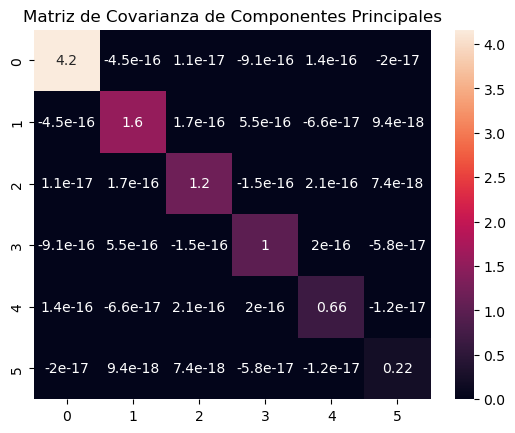

In [14]:
# Graficar la matriz de covarianza de las componentes principales
sns.heatmap(pd.DataFrame(components_final).cov(), annot=True)
plt.title('Matriz de Covarianza de Componentes Principales')
plt.show()

[Regresar al contenido](#Contenido)